https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

## Attribute Information:
Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ccpp.csv')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [8]:
X = df.drop(['PE'], axis=1).values
y = df['PE'].values

In [9]:
print(X)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [10]:
print(y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
predictions = model.predict(X_test)
print(predictions)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


In [17]:
r2_score(y_test, predictions)

0.9289374661293961

Text(0.5, 1.0, 'Actual vs. Predicted')

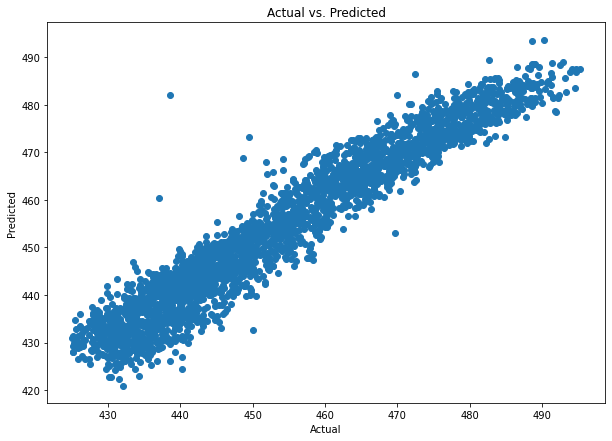

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [26]:
pd.DataFrame({'Actual Value': y_test, 'Predicted value': predictions, 'Difference': y_test-predictions})

,Actual Value,Predicted value,Difference
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
...,...,...,...
2866,440.27,443.739019,-3.469019
2867,438.42,442.129053,-3.709053
2868,442.88,444.058091,-1.178091
2869,456.64,459.347457,-2.707457
